# Coloured wind and geopotential

This is one cell notebook example that will help you plot coloured wind flags and geopotential height from grib files using Magics.  
Simple way to colour wind is by intensity and it is a default method in Magics. We will use advanced wind plotting method, by setting **wind_advanced_method** to **"on"** and then define colours and levels similar to setting contours.

At ECMWF  

#### From your workstation:
module swap (or load) Magics/new   
jupyter notebook  

load this notebook


List of all **mwind** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").

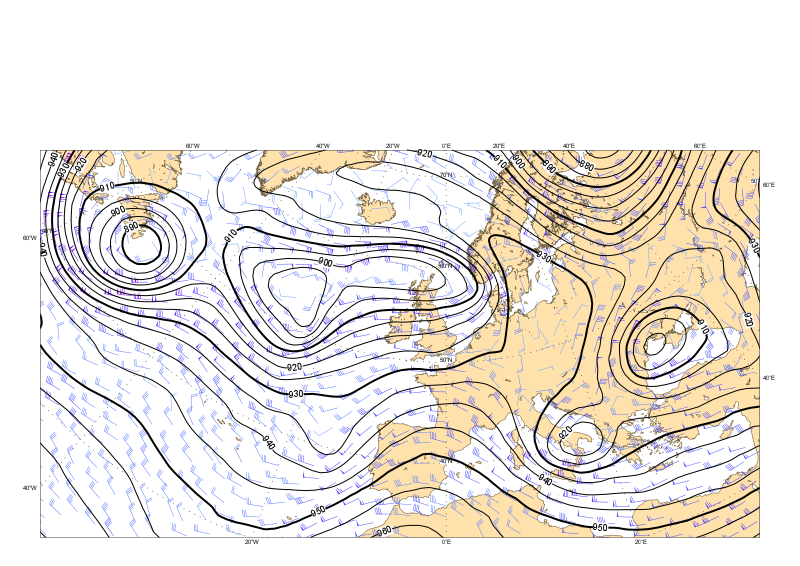

In [1]:
import Magics.macro as magics

# Setting the projection
europe = magics.mmap(
    subpage_clipping              = "on",
    subpage_lower_left_latitude   = 21.51,
    subpage_lower_left_longitude  = -37.27,
    subpage_upper_right_latitude  = 51.28, 
    subpage_upper_right_longitude = 65., 
    subpage_map_projection        = "polar_stereographic",
    page_id_line                  = "off")

# Defining the coastlines
coast = magics.mcoast(
    map_coastline_resolution        = "high",
    map_coastline_colour            = "tan",
    map_coastline_land_shade        = "on",    
    map_coastline_land_shade_colour = "cream",
    map_grid                        = "on",
    map_grid_line_style             = "dot",
    map_grid_colour                 = "tan"
)

# Load the grib data
wind_from_grib = magics.mgrib(
    grib_input_file_name = 'ghtuv.grib', 
    grib_wind_position_1 = 3,
    grib_wind_position_2 = 4)

gh = magics.mgrib(
    grib_input_file_name = 'ghtuv.grib', 
    grib_field_position = 1)

# Defining Wind flags
coloured_flags = magics.mwind(
    legend                                   = 'off',
    wind_field_type                          = 'flags',
    wind_flag_origin_marker                  = 'off',
    wind_flag_length                         = 0.6,
    wind_thinning_factor                     = 2.,
    wind_advanced_method                     = 'on',
    wind_advanced_colour_selection_type      = 'interval',
    wind_advanced_colour_level_interval      = 10.0,
    wind_advanced_colour_reference_level     = 20.0,
    wind_advanced_colour_max_value           = 140.0,
    wind_advanced_colour_min_value           = 0.0,
    wind_advanced_colour_table_colour_method = 'calculate',
    wind_advanced_colour_direction           = 'anti_clockwise',
    wind_advanced_colour_min_level_colour    = 'sky',
    wind_advanced_colour_max_level_colour    = 'burgundy')

#Defining the contour for geopotential height
gh_cont = magics.mcont(contour_automatic_setting = "ecmwf")

# Plotting
magics.plot(europe, coast, wind_from_grib, coloured_flags, gh, gh_cont)